In [87]:
date = '2023-07-15'

In [88]:
import csv
from datetime import datetime as dt

def load_csv(file):
    datetime = []
    temp = []
    humd = []
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            d, t, h = row
            datetime.append(dt.fromisoformat(d).timestamp())
            temp.append(float(t))
            humd.append(float(h))
    return (datetime, temp, humd)

In [89]:
import numpy as np

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [90]:
datetime_data, temp_data, humd_data = load_csv(f'zuraach_ail/{date}_raw.csv')


In [91]:
AVG_WINDOW = 1

temp_x = [float(dt.fromtimestamp(item).hour) + float(dt.fromtimestamp(item).minute)/60 for item in datetime_data]
humd_data = np.array(humd_data)
temp_data = np.array(temp_data)

humd_data = moving_average(humd_data, AVG_WINDOW)
temp_data = moving_average(temp_data, AVG_WINDOW)

# humd_data /= humd_data.max()
# temp_data /= temp_data.max()
# mix = humd_data * temp_data

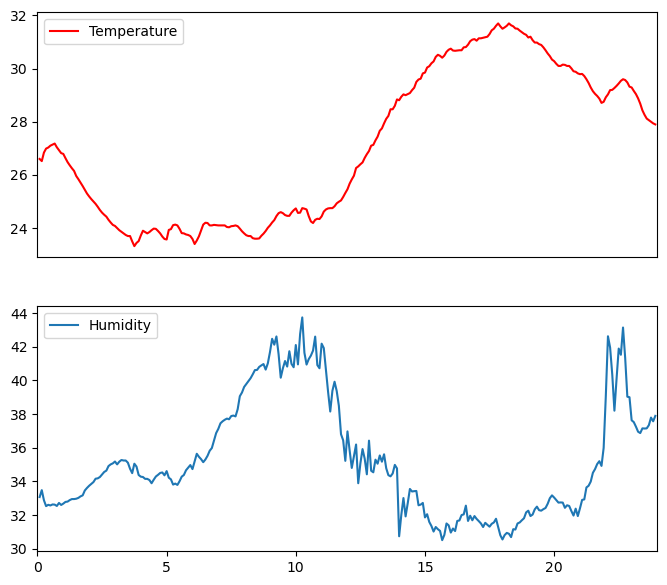

In [92]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(2, 1, 1)
ax1.axis([0, 24, None, None])
ax1.figure.set_figwidth(8)
ax1.figure.set_figheight(7)
plt.plot(temp_x, temp_data, label='Temperature', c='red')
ax1.get_xaxis().set_visible(False)
plt.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.axis([0, 24, None, None])
plt.plot(temp_x, humd_data, label='Humidity')
plt.legend()
plt.savefig(f'plots/{date}.png')